In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
# each layer depth (m)
data1=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0330-12.dz.nc')
lev1 = data1.variables['dz'][:]/100


In [3]:
lev1

masked_array(data=[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0,
                   10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0,
                   10.196807861328125, 10.564483642578125,
                   11.059950828552246, 11.678070068359375,
                   12.42413330078125, 13.309678077697754,
                   14.351409912109375, 15.571258544921875,
                   16.996795654296875, 18.662124633789062,
                   20.609024047851562, 22.888521194458008,
                   25.562471389770508, 28.70574951171875,
                   32.40837097167969, 36.77772521972656, 41.9403076171875,
                   48.042236328125, 55.24754333496094, 63.73191833496094,
                   73.66944885253906, 85.20892333984375,
                   98.43658447265625, 113.32466125488281,
                   129.6719970703125, 147.05343627929688,
                   164.8070831298828, 182.0913543701172,
                   198.0223388671875, 211.8595733642578,
                   

In [4]:
data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0021-01.KMT.nc')
value = data.variables['KMT'][:600,500:1800]

In [5]:
data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0300-09.UVEL.nc')
plotvar = data.variables['UVEL'][0,:,:]
lont = data.variables['ULONG'][:600,500:1800]
latt = data.variables['ULAT'][:600,500:1800]

plotvar[plotvar == -0.009999999776482582]=0
plotvar[plotvar == -1.0]=0
where_are_nan = np.isnan(plotvar)
plotvar[where_are_nan] = 0


In [6]:
u = plotvar[:,0:600,500:1800]/100 #(m/s)
a = np.arange(0,599)
b = np.arange(0,1300)
A1= np.zeros([62,600,1300])
for j in a:
    for i in b:
        A1[:,j,i] = u[:,j,i] * lev1[:] * (latt[j+1,i]-latt[j,i])*110.95 * 1000  #(unit m)

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/numpy/ma/core.py:1015: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


In [8]:
A1[A1>100000000000000]=0
final = np.nansum(A1,axis=0)

In [26]:
np.savetxt(fname="/scratch/user/xiliangdiao/firstpaper/data.csv", X=final,delimiter=",")

In [53]:
# 读取文件
final = np.loadtxt(fname="/scratch/user/xiliangdiao/firstpaper/0150-02data.csv",  delimiter=",")

In [54]:
pwd

'/scratch/user/xiliangdiao/plot'

In [55]:
####only up 200m
#B1 = A1[0:20,:,:]
#final = np.nansum(B1,axis=0)

In [56]:
final.shape

(600, 1300)

In [57]:
num = np.arange(1,599,1)
stream = np.zeros([600,1300])
count = 0

stream[0,:] = final[0,:]
for i in num:
    stream[count+1,:] = stream[count,:]+final[i,:]
    count = count + 1

In [58]:
stream[:,600]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [59]:
streamSV = stream/1000000

In [60]:
        # Pick some of the nicer colors from the palette...
        nice_cmap=plt.get_cmap('Reds')
        lev_cmap = nice_cmap([10,20,30,40,50,60,70,80,90,100,110,120,140,150,160,170,180,190,200,240])
        #new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
        new_cmap = cols.ListedColormap(lev_cmap,"Reds")
        
        nice_levels = [0,5,10,15,20,25,30,35,40,45,50,55,60,65]
     
        norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)

In [61]:
streamSV[streamSV >0]= np.nan

In [62]:
data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0300-09.UVEL.nc')
plotvar = data.variables['UVEL'][0,:,:]
u = plotvar[20,:600,500:1800]
lontu = data.variables['ULONG'][:600,500:1800]
lattu = data.variables['ULAT'][:600,500:1800]
lattu[lattu == -1.0] = np.nan

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


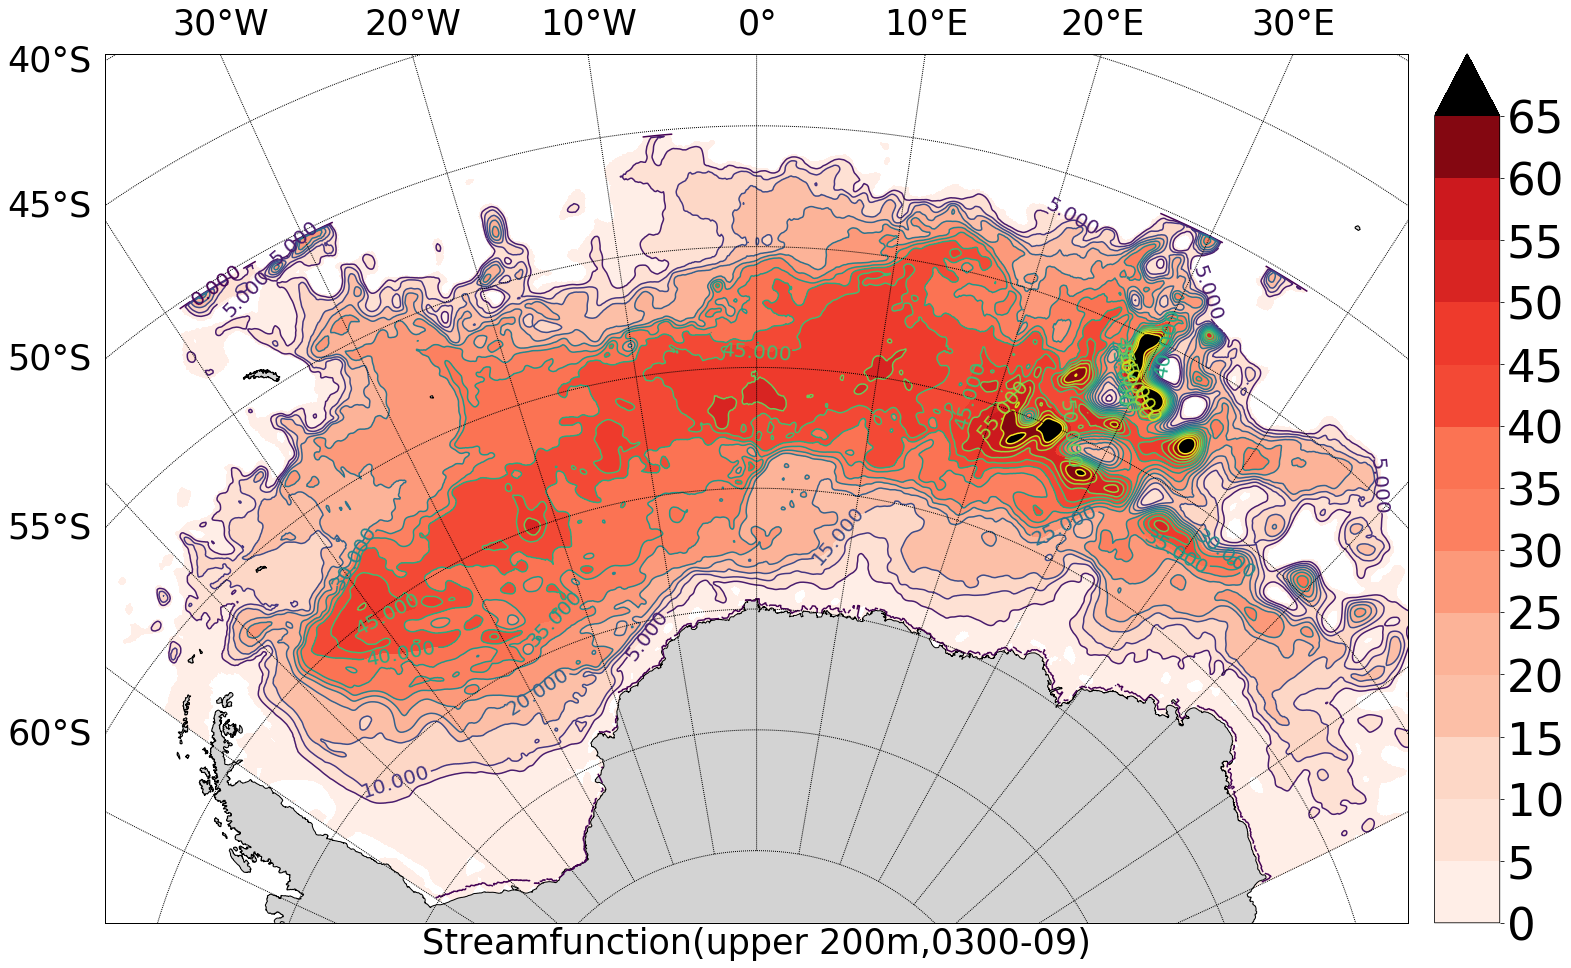

In [63]:
plt.figure(figsize=(25,20))
my_font = {'fontname':'Cambria', 'size':'35'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -65, lon_0 = 0,area_thresh = 100,\
                     width = 6000000,height = 4000000,resolution ='h') 
#############################################
##width = 2500000,height = 1500000
##lat_0 = -65, lon_0 = 0
#############################################
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lontu,lattu)
#lw = 5*U / U.max()

CP = map.contourf(x[:,:],y[:,:],-streamSV[:,:],cmap = new_cmap,levels = nice_levels,extend='max')
MP = map.contour(x,y,-streamSV,'k',levels = nice_levels)
plt.clabel(MP, inline=1, fontsize=20)
CP.cmap.set_over('black')
#CP.cmap.set_under('darkblue')
cbar =map.colorbar(CP, ticks=nice_levels,extendfrac='auto')
cbar.ax.tick_params(labelsize=45)
plt.xlabel("Streamfunction(upper 200m,0300-09)",**my_font)
plt.savefig("Str-200.png",bbox_inches='tight')